
#Introduzione a Pandas

---


*Antonio Emanuele Cinà, Assistant Professor @ University of Genoa*

**Analisi e Rappresentazione dei Dati** --
22 Marzo 2024

## Lezione 4: Pandas II


Materiale: https://tinyurl.com/ARD24-L4

Github: https://github.com/Cinofix/analisi-e-rappresentazione-dati

## DataFrame
I dati che vengono caricati sono in sottoforma di [***DataFame***](https://pandas.pydata.org/docs/reference/frame.html).

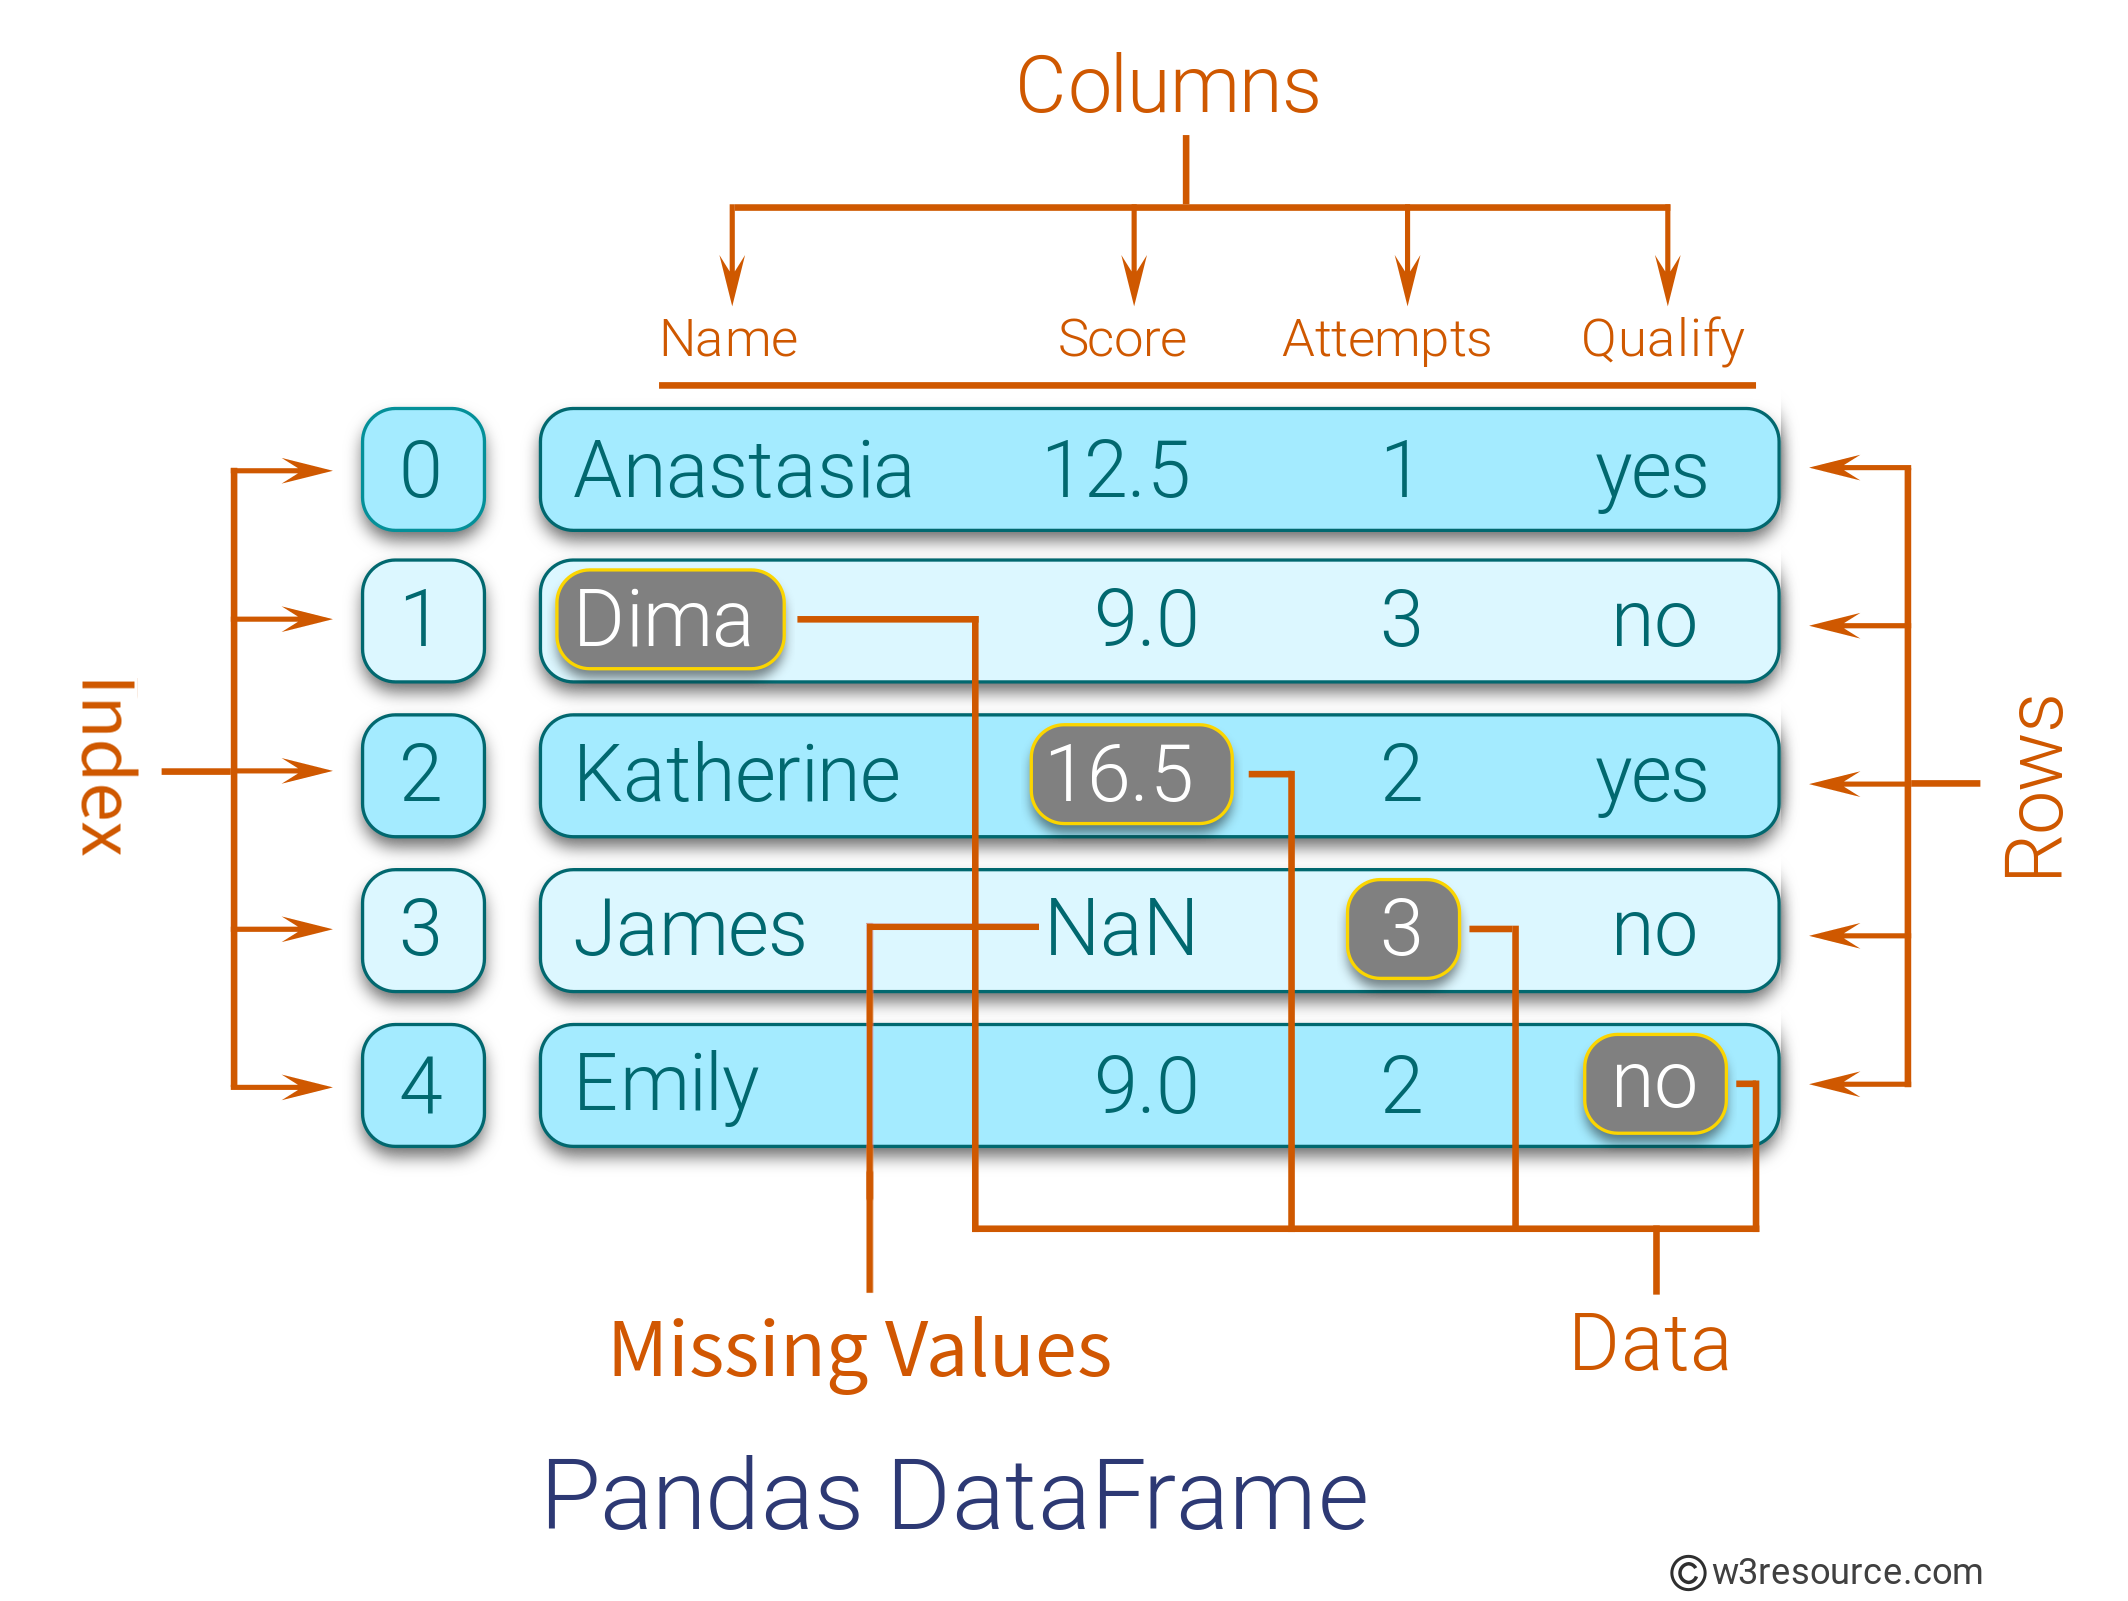

## Series
In Pandas ogni colonna di un DataFrame è una [***Series***](https://pandas.pydata.org/docs/reference/series.html). Se un DataFrame può essere visto come una matrice righe * colonne, una Series può essere vista come un vettore riga.

In [63]:
import pandas as pd

path_dip_csv = "https://github.com/Cinofix/analisi-e-rappresentazione-dati/raw/main/data/dipendenti.csv"

data = pd.read_csv(path_dip_csv)

data.head(3)

,ID,Nome,Età,Regione,Salario,Verificato
0,829744,Elona,NaN,Sicilia,1921.0,NO
1,800269,Cheikh,53.0,Abruzzo,1563.0,SI
2,823929,Girolama,30.0,Emilia Romagna,2144.0,SI


Dato il dataset **dipendenti.csv**, supponiamo di voler accedere alla Series della colonna **Nome**.

Esistono due modi per accedere alle Series di un DataFrame:

Il primo utilizzando il nome della Series come se fosse un'attributo del DataFrame:

In [ ]:
series_nome = data.Nome

type(series_nome)

pandas.core.series.Series


**ATTENZIONE:** la **N** di **Nome** deve essere maiuscola perché la colonna si chiama così. In Pandas i nomi delle colonne sono [*case sensitive*](https://it.wikipedia.org/wiki/Sensibile_alle_maiuscole).

In [ ]:
series_nome = data.nome

type(series_nome)

AttributeError: 'DataFrame' object has no attribute 'nome'

Il secondo metodo per accedere ad una Series è lo stesso di un dizionario Python.

In [ ]:
series = data["Nome"]

type(series)

pandas.core.series.Series

**Quale è meglio?**

Dipende:
- Il primo metodo è più veloce perché permette di sfruttare l'autocompletamento dell'IDE;
- Il secondo permette di accedere a colonne con nomi che includono il carattere spazio ` `.

### Operazioni
Le Series implementano molte operazioni di base (somma, sottrazione, moltiplicazione ecc.) e metodi (massimo, minimo, ecc.).


In [ ]:
data["Salario"].head(3)

0    1921.0
1    1563.0
2    2144.0
Name: Salario, dtype: float64

In [ ]:
data["Età"].head(3)

0     NaN
1    53.0
2    30.0
Name: Età, dtype: float64

Calcoliamo il salario orario supponendo 40 ore settimanali.

In [ ]:
ore_lavoro_mensili = 40 * 4 # 40 ore per 4 settimane
data["Salario"] / ore_lavoro_mensili

0      12.00625
1       9.76875
2      13.40000
3      11.23750
4      13.70000
         ...   
995     8.25000
996    15.91875
997    13.43125
998    11.35625
999    16.39375
Name: Salario, Length: 1000, dtype: float64

#### ***.sum()***

la somma dei valori all'interno della colonna **Salario** con [*.sum()*](https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html):

In [ ]:
data['Salario'].sum()

1794830.0

#### ***.mean()***

il **Salario** medio con il metodo [*.mean()*](https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html):

NB: viene calcolata solo dei valori disponibili

In [ ]:
data["Salario"].mean()

1983.2375690607735

#### ***.max() e .min()***

oppure come sia possibile calcolare il **Salario** massimo con il metodo [*max()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html) ed il minimo con [*min()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html):

In [ ]:
data["Salario"].max()

2699.0

In [ ]:
data["Salario"].min()

1300.0

Possiamo anche recuperare l'indice della riga utilizzano il comando [.argmax()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.argmax.html) e [.argmin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.argmin.html)

In [ ]:
data["Salario"].argmax()

308

In [ ]:
data["Salario"].argmin()

315

#### .value_count()

Per i dati di tipo stringa o categoriali può risultare utile il metodo [.value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) che conta quanti valori abbiamo per ogni etichetta. Di base non conta i valori nulli, se vogliamo vedere anche quelli dobbiamo usare il parametro `dropna=False`.

In [ ]:
data["Regione"].value_counts()

Trentino-Alto Adige      48
Lombardia                47
Sardegna                 46
Toscana                  46
Marche                   45
Molise                   45
Valle d'Aosta            45
Calabria                 44
Basilicata               44
Liguria                  44
Friuli-Venezia Giulia    43
Piemonte                 43
Abruzzo                  43
Lazio                    42
Emilia Romagna           41
Campania                 41
Sicilia                  39
Veneto                   38
Umbria                   36
Puglia                   34
Name: Regione, dtype: int64

In [ ]:
data["Regione"].value_counts(dropna=False)

NaN                      146
Trentino-Alto Adige       48
Lombardia                 47
Sardegna                  46
Toscana                   46
Molise                    45
Valle d'Aosta             45
Marche                    45
Basilicata                44
Calabria                  44
Liguria                   44
Piemonte                  43
Friuli-Venezia Giulia     43
Abruzzo                   43
Lazio                     42
Campania                  41
Emilia Romagna            41
Sicilia                   39
Veneto                    38
Umbria                    36
Puglia                    34
Name: Regione, dtype: int64

Inoltre le Series possiedono molti altri metodi per modificare i dati e organizzarli. Ne vedremo alcuni esempi più avanti in un contesto di pulizia e preparazione del dataset.

#### Esercizio 1

1. Quanti dipendenti sono verificati e quanti no? Manca questa informazione a qualcuno di loro? Se si, a quanti?

In [ ]:
data["Verificato"].value_counts(dropna=False)

SI     490
NO     459
NaN     51
Name: Verificato, dtype: int64

#### Esercizio 2
2. Qual è l'età media dei dipendenti?

In [ ]:
data["Età"].mean()

39.90193965517241

# Lavorare con il dataframe

Utiliziamo ancora il dataset *dipendenti.csv*

In [ ]:
import pandas as pd
path_dip_csv = "https://github.com/Cinofix/analisi-e-rappresentazione-dati/raw/main/data/dipendenti.csv"

data = pd.read_csv(path_dip_csv)

## Gli indici
Una delle funzionalità più importanti dei DataFrame (e non solo), sono gli indici.

Gli indici ci permettono di accedere alle informazioni all'interno del DataFrame / Series andando a selezionare delle righe specifiche.

Di base pandas aggiunge come indice un valore univoco incrementale e possiamo osservarlo come prima colonna a sinistra senza nome.

In [ ]:
data.head(3)

,ID,Nome,Età,Regione,Salario,Verificato
0,829744,Elona,NaN,Sicilia,1921.0,NO
1,800269,Cheikh,53.0,Abruzzo,1563.0,SI
2,823929,Girolama,30.0,Emilia Romagna,2144.0,SI


La selezione ci permette di accedere a valori specifici del DataFrame e, se vogliamo, di modificali. Per fare questo utilizziamo il metodo [*.iloc[]*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

La sintassi di accesso con *.iloc[]* è la seguente:
```
data.iloc[indice_righe, indice_colonne]
```

Ora supponiamo di voler accedere all'`ID` della persona contenuta alla riga di indice `3`:

In [ ]:
data.iloc[3]

ID            975426
Nome           Marwa
Età             60.0
Regione       Umbria
Salario       1798.0
Verificato        NO
Name: 3, dtype: object

In [ ]:
data['ID'].iloc[3]

842108

Ora, modifichiamo l'`ID` della riga di indice 3 con il valore `975426` utilizzando invece il metodo `at` utilizzabile come

`data[riga, colonna] = valore`

In [ ]:
data.at[3,'ID'] = 975426

data['ID'].iloc[3]

975426

## Filtrare i dati: le maschere

Ora supponiamo di voler accedere a tutte le righe delle persone che si trovano in **Veneto**, ora come ora per accedere a delle persone o a gruppi di persone specifici, dobbiamo sapere gli indici delle righe che li contengono.

Questo risulta difficile, lento e per nulla comodo:

In [ ]:
# posizione righe con Regione == Veneto
idx_veneto = [16, 63, 67, 68, 121, 197, 211, 220, 233, 250, 298, 326, 400, 488, 491, 492, 516, 532, 535, 547, 548, 580, 581, 599, 608, 676, 691, 694, 715, 722, 731, 783, 820, 836, 861, 898, 902, 939]

print(data.iloc[idx_veneto])

         ID               Nome   Età Regione  Salario Verificato
16   854798             Melisa  63.0  Veneto   2455.0        NaN
63   806365             Pietra  21.0  Veneto      NaN         SI
67   832437             Larisa  53.0  Veneto   2237.0         SI
68   815045              Endri  45.0  Veneto   2280.0         NO
121  865861             Rachid  62.0  Veneto   2120.0         SI
197  858849          Pierluigi  43.0  Veneto   1506.0         SI
211  857233                NaN  46.0  Veneto   2264.0        NaN
220  892940             Aurica  63.0  Veneto   1369.0         NO
233  865209          Anna rosa  24.0  Veneto   2293.0         SI
250  826323              Giusj  43.0  Veneto   2287.0         NO
298  830793               Zita  18.0  Veneto      NaN         NO
326  841190              Layla  40.0  Veneto   2057.0         NO
400  862460      Silvana maria  36.0  Veneto   1514.0         NO
488  881155       Pietro paolo  23.0  Veneto   1495.0         NO
491  845986            Ro

Tuttavia possiamo andare a creare una **MASCHERA** per accedere immediatamente a tutte le persone che vivono in **Veneto** senza conoscerne gli indici.

Generalmente una maschera consiste in un array di True e False che rispettano una determinata operazione.

Ora utilizziamo l'indice delle colonne per accedere alla colonna (Series) **Regione** e cerchiamo tutte le righe in cui è contenuto è **Veneto**.

In [ ]:
maschera = data['Regione'] =='Veneto'
maschera

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Regione, Length: 1000, dtype: bool

In [ ]:
print(data[maschera])

         ID               Nome   Età Regione  Salario Verificato
16   854798             Melisa  63.0  Veneto   2455.0        NaN
63   806365             Pietra  21.0  Veneto      NaN         SI
67   832437             Larisa  53.0  Veneto   2237.0         SI
68   815045              Endri  45.0  Veneto   2280.0         NO
121  865861             Rachid  62.0  Veneto   2120.0         SI
197  858849          Pierluigi  43.0  Veneto   1506.0         SI
211  857233                NaN  46.0  Veneto   2264.0        NaN
220  892940             Aurica  63.0  Veneto   1369.0         NO
233  865209          Anna rosa  24.0  Veneto   2293.0         SI
250  826323              Giusj  43.0  Veneto   2287.0         NO
298  830793               Zita  18.0  Veneto      NaN         NO
326  841190              Layla  40.0  Veneto   2057.0         NO
400  862460      Silvana maria  36.0  Veneto   1514.0         NO
488  881155       Pietro paolo  23.0  Veneto   1495.0         NO
491  845986            Ro

In [ ]:
print(data[data['Regione'] =='Veneto'])

         ID               Nome   Età Regione  Salario Verificato
16   854798             Melisa  63.0  Veneto   2455.0        NaN
63   806365             Pietra  21.0  Veneto      NaN         SI
67   832437             Larisa  53.0  Veneto   2237.0         SI
68   815045              Endri  45.0  Veneto   2280.0         NO
121  865861             Rachid  62.0  Veneto   2120.0         SI
197  858849          Pierluigi  43.0  Veneto   1506.0         SI
211  857233                NaN  46.0  Veneto   2264.0        NaN
220  892940             Aurica  63.0  Veneto   1369.0         NO
233  865209          Anna rosa  24.0  Veneto   2293.0         SI
250  826323              Giusj  43.0  Veneto   2287.0         NO
298  830793               Zita  18.0  Veneto      NaN         NO
326  841190              Layla  40.0  Veneto   2057.0         NO
400  862460      Silvana maria  36.0  Veneto   1514.0         NO
488  881155       Pietro paolo  23.0  Veneto   1495.0         NO
491  845986            Ro

In [ ]:
print(data[data.Regione =='Veneto'])

         ID               Nome   Età Regione  Salario Verificato
16   854798             Melisa  63.0  Veneto   2455.0        NaN
63   806365             Pietra  21.0  Veneto      NaN         SI
67   832437             Larisa  53.0  Veneto   2237.0         SI
68   815045              Endri  45.0  Veneto   2280.0         NO
121  865861             Rachid  62.0  Veneto   2120.0         SI
197  858849          Pierluigi  43.0  Veneto   1506.0         SI
211  857233                NaN  46.0  Veneto   2264.0        NaN
220  892940             Aurica  63.0  Veneto   1369.0         NO
233  865209          Anna rosa  24.0  Veneto   2293.0         SI
250  826323              Giusj  43.0  Veneto   2287.0         NO
298  830793               Zita  18.0  Veneto      NaN         NO
326  841190              Layla  40.0  Veneto   2057.0         NO
400  862460      Silvana maria  36.0  Veneto   1514.0         NO
488  881155       Pietro paolo  23.0  Veneto   1495.0         NO
491  845986            Ro

### .isin()

Se vogliamo accedere alle righe delle persone che lavorano in **Liguria** o **Piemonte**, ci basta utilizzare il metodo [*isin*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html) nel modo seguente:

In [ ]:
data['Regione'].isin(['Liguria', 'Piemonte'])

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Regione, Length: 1000, dtype: bool

In [ ]:
data[data['Regione'].isin(['Liguria', 'Piemonte'])]

,ID,Nome,Età,Regione,Salario,Verificato
41,827610,Salah,29.0,Liguria,2667.0,NO
43,826433,Barbara,61.0,Liguria,NaN,NO
47,830192,Liborio,48.0,Piemonte,1457.0,NO
66,898380,Marjan,31.0,Piemonte,1946.0,SI
71,802006,Ciprian,49.0,Liguria,2253.0,NO
...,...,...,...,...,...,...
975,860156,Meri,NaN,Piemonte,1697.0,SI
977,816178,Vasile,24.0,Piemonte,2626.0,NO
979,863288,Jolanda,26.0,Piemonte,2472.0,SI
989,847504,Vanna,50.0,Piemonte,2214.0,NO


### Esercizio 3

1. Accedere a tutte le righe delle persone che lavorano in **Sardegna**, **Sicilia** o **Calabria**.

In [ ]:
import pandas as pd

path_dip_csv =  "https://github.com/Cinofix/analisi-e-rappresentazione-dati/raw/main/data/dipendenti.csv"

data = pd.read_csv(path_dip_csv)

data[data['Regione'].isin(["Sardegna", "Sicilia", "Calabria"])]

,ID,Nome,Età,Regione,Salario,Verificato
0,829744,Elona,NaN,Sicilia,1921.0,NO
1,800269,Cheikh,53.0,Abruzzo,1563.0,SI
2,823929,Girolama,30.0,Emilia Romagna,2144.0,SI
3,842108,Marwa,60.0,Umbria,1798.0,NO
4,861546,NaN,26.0,Toscana,2192.0,SI
...,...,...,...,...,...,...
995,833784,Carmen,43.0,Toscana,1320.0,NO
996,870201,Erjon,59.0,NaN,2547.0,NO
997,886127,Carla maria,23.0,Campania,2149.0,NO
998,847566,El mehdi,32.0,NaN,1817.0,NO


In [64]:
data_3_regioni = data[data['Regione'].isin(["Sardegna", "Sicilia", "Calabria"])]
data_3_regioni["Salario"].mean()

1998.3684210526317

### Modificare i dati con le maschere

Inoltre le maschere tornano molto utili quando vogliamo andare a modificare contemporaneamente tutte le righe che rispettano una determinata condizione.

Supponiamo ora di voler contrassegnare tutte le persone che lavorano in **Veneto** con la label **SI** nella colonna **Verificato**, ci basterà creare una maschera che utilizzeremo poi per modificare le righe.

Per selezionare e modificare le righe utilizziamo il metodo `.loc` (senza la **i** !!) nel seguente modo:


In [ ]:
maschera_veneto = data['Regione'] == "Veneto"

data[maschera_veneto]["Verificato"].value_counts()

NO    21
SI    13
Name: Verificato, dtype: int64

In [ ]:
maschera_veneto = data['Regione'] == "Veneto"

data.loc[maschera_veneto, "Verificato"] = 'SI'

data.loc[maschera_veneto,"Verificato"].value_counts()

SI    38
Name: Verificato, dtype: int64

### And, Or e Not

Possiamo anche utilizzare gli operatori `&` (**and**), `|` (**or**) e ~ (**not**) per creare ricerche più sofisticate:

L'esempio seguente mostra come selezionare tutti i dipendenti che non vivono in **Veneto** e neppure in **Toscana**.

In [ ]:
data[ ~((data.Regione=="Veneto") | (data.Regione=="Toscana")) ]

,ID,Nome,Età,Regione,Salario,Verificato
0,829744,Elona,NaN,Sicilia,1921.0,NO
1,800269,Cheikh,53.0,Abruzzo,1563.0,SI
2,823929,Girolama,30.0,Emilia Romagna,2144.0,SI
3,842108,Marwa,60.0,Umbria,1798.0,NO
5,888819,Edda,21.0,Lombardia,2339.0,NO
...,...,...,...,...,...,...
994,848039,Magda,18.0,Emilia Romagna,2353.0,NO
996,870201,Erjon,59.0,NaN,2547.0,NO
997,886127,Carla maria,23.0,Campania,2149.0,NO
998,847566,El mehdi,32.0,NaN,1817.0,NO


### Esercizio 4

1. Prendere il dataset **penguins_size.csv** e calcolare il peso medio dei pinguini maschi

In [66]:
path_dip_csv = "https://github.com/Cinofix/analisi-e-rappresentazione-dati/raw/main/data/penguins_size.csv"

data = pd.read_csv(path_dip_csv)

only_male = data[data["sex"] == "MALE"]

peso_medio = only_male["body_mass_g"].mean()
peso_medio

4545.684523809524

In [67]:
peso_medio/1000

4.545684523809524

### Esercizio 5

2. E' un pinguino maschio o un pinguino femmina quello che pesa di più? Qual è la differenza tra i due pesi?

In [68]:
only_male = data["sex"] == "MALE"
max_male = data[only_male]["body_mass_g"].max()

only_female = data["sex"] == "FEMALE"
max_female = data[only_female]["body_mass_g"].max()

print(f"{max_male=}, {max_female=}")

difference = max_male - max_female

print(f"{difference=}")

max_male=6300.0, max_female=5200.0
difference=1100.0


### Esercizio 6

3. Dal dataset **dipendenti.csv**, quanti sono i dipendenti che hanno età minore o uguale a 25 anni?

- Qual è il loro salario medio?
- Chi percepisce il salario minore?
- Chi percepisce il salario maggiore?

In [69]:
path_dip_csv =  "https://github.com/Cinofix/analisi-e-rappresentazione-dati/raw/main/data/dipendenti.csv"

data = pd.read_csv(path_dip_csv)

In [70]:
data_eta_25 = data[data["Età"] <= 25]
data_eta_25.shape

(193, 6)

In [71]:
data_eta_25["Salario"].mean()

1985.1657142857143

In [72]:
index_min = data_eta_25["Salario"].argmin()

data_eta_25.iloc[index_min]

ID            853235
Nome           Delia
Età             20.0
Regione        Lazio
Salario       1336.0
Verificato        SI
Name: 515, dtype: object

In [73]:
index_max = data_eta_25["Salario"].argmax()

data_eta_25.iloc[index_max]

ID              816931
Nome          Abdellah
Età               22.0
Regione         Veneto
Salario         2695.0
Verificato          NO
Name: 547, dtype: object

### Esercizio 7

4. Utilizzando il dataset **dipendenti.csv**, aggiungere 150€ al salario dei dipedenti che hanno un'età minore o uguale a 25 anni ed un salario minore di 1500€.

In [ ]:
path_dip_csv =  "https://github.com/Cinofix/analisi-e-rappresentazione-dati/raw/main/data/dipendenti.csv"

data = pd.read_csv(path_dip_csv)

mask_query = ((data["Salario"]<1500) & (data["Età"] <=25))

print(data[mask_query]["Salario"].head())

data.loc[mask_query, "Salario"] = data[mask_query]["Salario"]+150

print(data[mask_query]["Salario"].head())

37     1471.0
50     1463.0
95     1360.0
215    1480.0
240    1393.0
Name: Salario, dtype: float64
37     1621.0
50     1613.0
95     1510.0
215    1630.0
240    1543.0
Name: Salario, dtype: float64
